# [Matplotlib](https://matplotlib.org/3.1.1/gallery/index.html)

Z dokumentacji:

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For examples, see the sample plots and thumbnail gallery.

For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users.


[Opracowano na podstawie tutorialu na UAB, Barcelona]

Wykonajmy kilka operacji, które przygotowują nasz zeszyt:

In [1]:
# only for the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

# Make the size and fonts larger for this presentation
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2

## Line plot

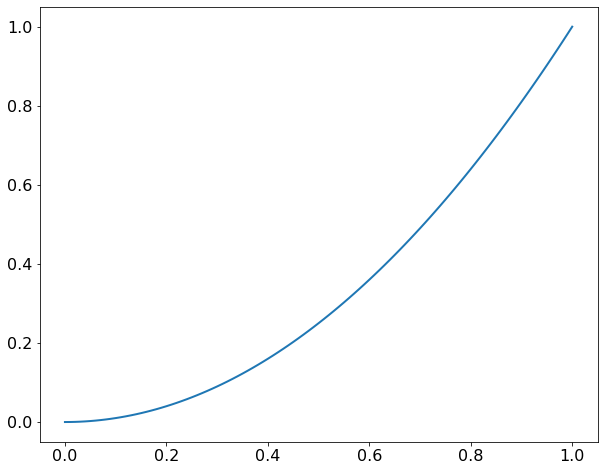

In [2]:
x = np.linspace(0, 1, 101) # 101 numbers from 0 to 1

plt.plot(x, x**2)

### Różne style:

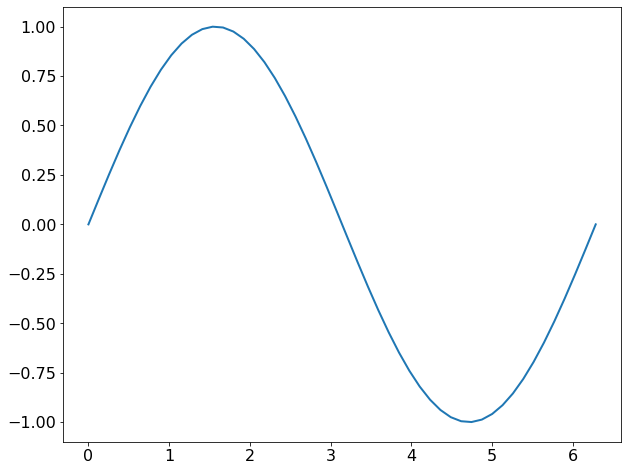

In [3]:
t = np.linspace(0, 2 * np.pi)   # 50 points between 0 and 2π
plt.plot(t, np.sin(t));

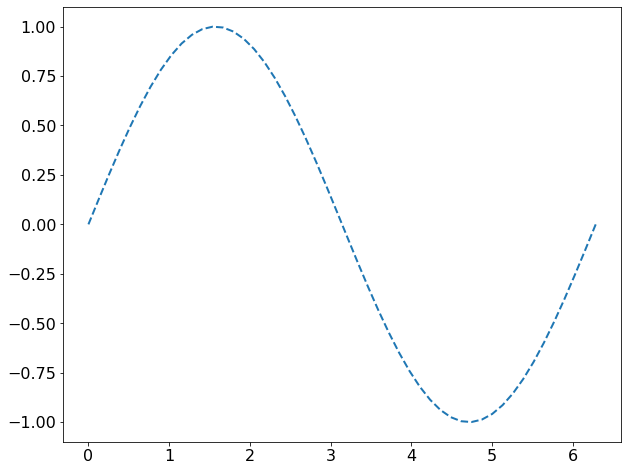

In [16]:
plt.plot(t, np.sin(t), '--');

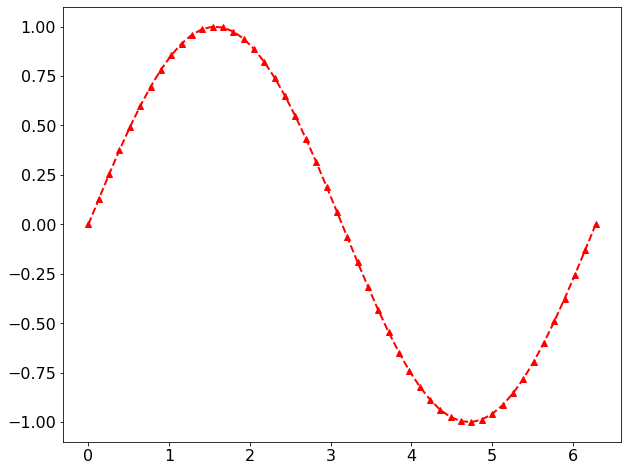

In [32]:
# plt.plot(t, np.sin(t), 'r^--')
plt.plot(t, np.sin(t), color='r', marker='^', linestyle='--');   # same thing!

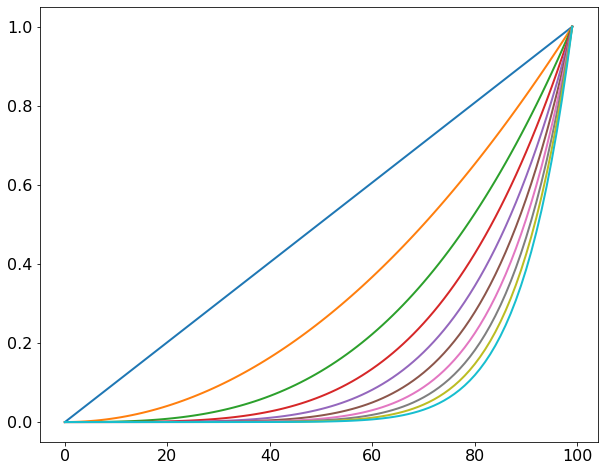

In [38]:
# new in matplotlib 2.0, all colors of the color rotation available as C<N>
# Multiple lines in the same plot
x = np.linspace(0, 1, 100)
for n in range(10):
    plt.plot(x**(n + 1), color='C{}'.format(n))
# 'C1', 'C2', itd.

Wszystkie style i kolory: [matplotlib.axes.Axes.plot](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot)


In [39]:
months = range(1, 13)
min_temp = np.array([-30.6, -34.3, -26.7, -11.7, -6.1, 1.1, 3.9, 3.3, -2.1, -8.2, -18.2, -22.8])
max_temp = np.array([21.7, 19.4, 31.7, 30.6, 36.7, 40.6, 40.6, 37.2, 37.2, 32.8, 26.1, 20.0])

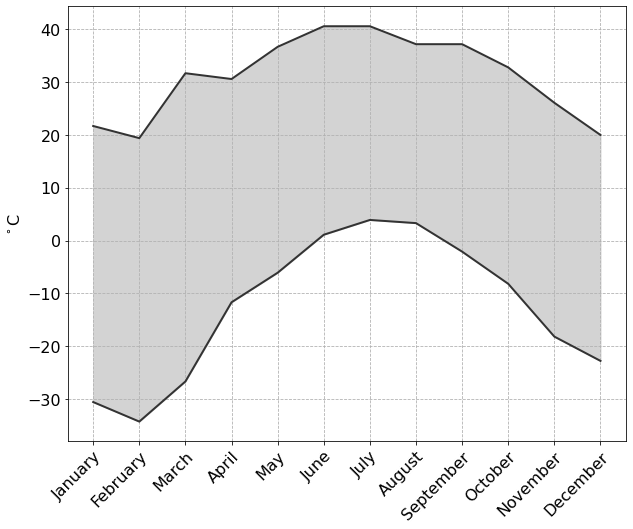

In [52]:
plt.plot(months, min_temp, c='0.2')
plt.plot(months, max_temp, color='0.2')

########################## 1:
plt.ylabel('$^\circ$C')

plt.fill_between(months, min_temp, max_temp, color='lightgray')
plt.grid(linestyle='--')

########################## 2:
month_names = ['January',
          'February',
          'March',
          'April',
          'May',
          'June',
          'July',
          'August',
          'September',
          'October',
          'November',
          'December']

plt.xticks(
    months,
    month_names,
    rotation=45,
    rotation_mode='anchor',
    horizontalalignment='right',  # or ha
    verticalalignment='top',      # or va
);


## Historgramy

### 1D

In [53]:
plt.hist?

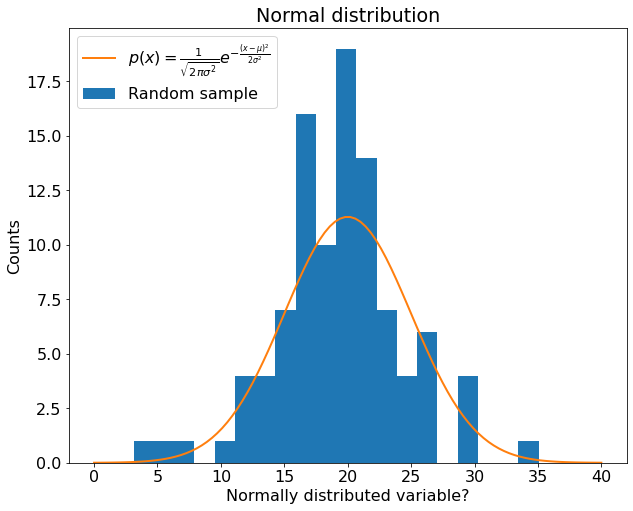

In [59]:
sample_size = 100
m = 20
s = 5
normal_sample = np.random.normal(m, s, sample_size)
bins = np.linspace(0, 50, 101)
counts, bins, _ = plt.hist(normal_sample, bins=20, label='Random sample')
plt.xlabel('Normally distributed variable?')
plt.ylabel('Counts')
plt.title('Normal distribution')

# Add a line plot to compare with expected distribution
x = np.linspace(0, 40, 100)
y = 1/np.sqrt(1*np.pi*s**2)*np.exp(-(x - m)**2/(2*s**2))*sample_size
plt.plot(x, y, label=r'$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$')

# Add a legend
plt.legend(loc='upper left')
# plt.legend(loc=(0.2, 0.2))

### 2D

In [ ]:
plt.hist2d?

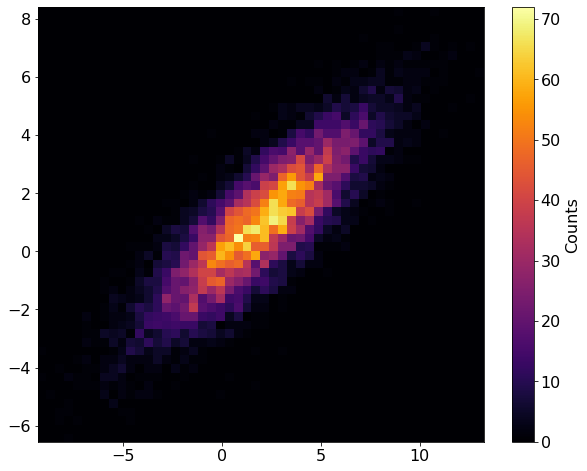

In [71]:
mean = [2, 1]
cov = [[9, 5],
       [5, 4]]

x, y = np.random.multivariate_normal(mean, cov, size=10000).T
# plt.scatter(x,y)
hist_output = plt.hist2d(x, y, bins=50, cmap='inferno') # try different color maps: viridis(default), inferno, gist_heat
# plt.hist2d(x, y, bins=50)
# plt.hist2d(x, y, bins=[25, 50], range=[[-10, 14], [-5, 7]])

plt.colorbar(label='Counts'); 

## Bar plot

In [ ]:
plt.bar?

<BarContainer object of 20 artists>

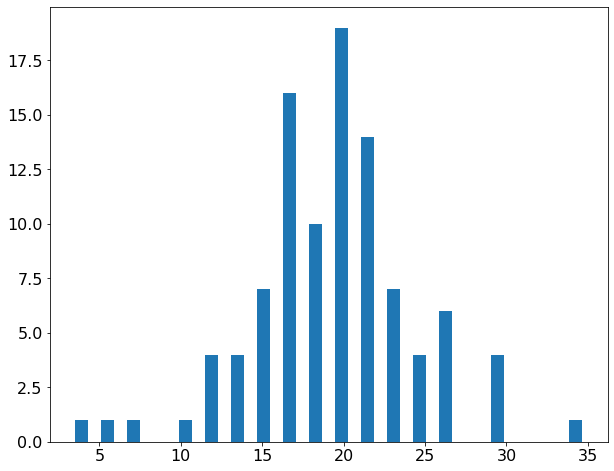

In [74]:
# Reusing the data from the 1D histogram
centers = (bins[:-1] + bins[1:])/2.
plt.bar(centers, counts)

# Not exactly the plot we had previously
# We have to set the width of the bar to the width of the bin
# bin_width = bins[1:] - bins[:-1]
# plt.bar(centers, counts, bin_width)

### Multiple Bar Plot

In [75]:
import os
# Przygotowanie ścieżki do pliku:
data_directory= "../data" # Jeżeli zapisaliśmy dane gdzieś indziej musimy tutaj to zmienić.
data_path= os.path.join(data_directory, "power_sources.csv")

In [80]:
power_data = np.loadtxt(data_path, delimiter=';', skiprows=1, usecols=range(1, 9))
power_headers = ['Hydroelectric',
 'Nuclear',
 'Coal',
 'Combined Cycle',
 'Wind',
 'Thermal',
 'Other non renewable',
 'Other renewable']
power_labels = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

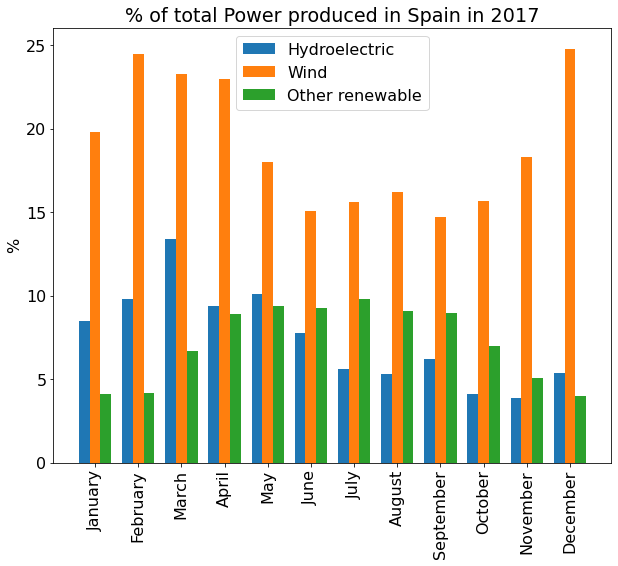

In [81]:
plt.bar(np.arange(1, 13) - 1/4., power_data[:, 0], width=1/4., label=power_headers[0])
plt.bar(np.arange(1, 13), power_data[:, 4], width=1/4., label=power_headers[4])
plt.bar(np.arange(1, 13) + 1/4., power_data[:, 7], width=1/4., label=power_headers[7])
plt.xticks(np.arange(1, 13), power_labels, rotation=90)
plt.title('% of total Power produced in Spain in 2017')
plt.ylabel('%')
plt.legend()

### Stacked bar plot

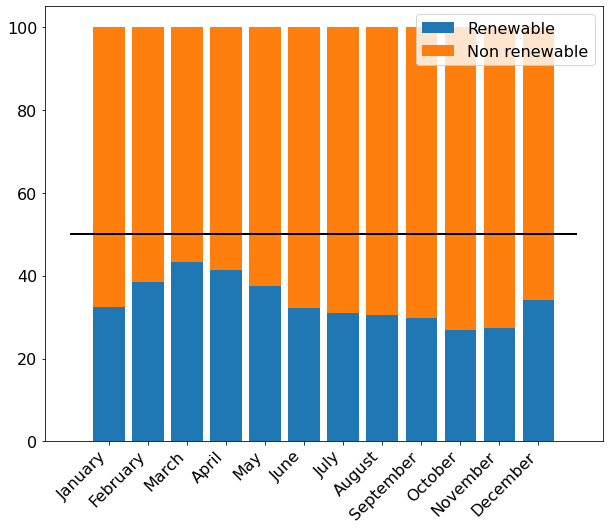

In [89]:
renewable = power_data[:, [0, 4, 7]].sum(axis=1) # Hydroelectric + Wind + Other renewable'
non_renewable = power_data[:, [1, 2, 3, 5, 6]].sum(axis=1) # Nuclear + Coal + Combined Cycle + Thermal + Other non renewable

plt.bar(range(1, 13), renewable, label='Renewable')
plt.bar(range(1, 13), non_renewable, bottom=renewable, label='Non renewable')

plt.xticks(range(1, 13), power_labels, rotation=45, ha='right')
plt.hlines(50, 0, 13)
plt.legend()

#plt.yticks([]);

### Scatter plot

In [ ]:
plt.scatter?

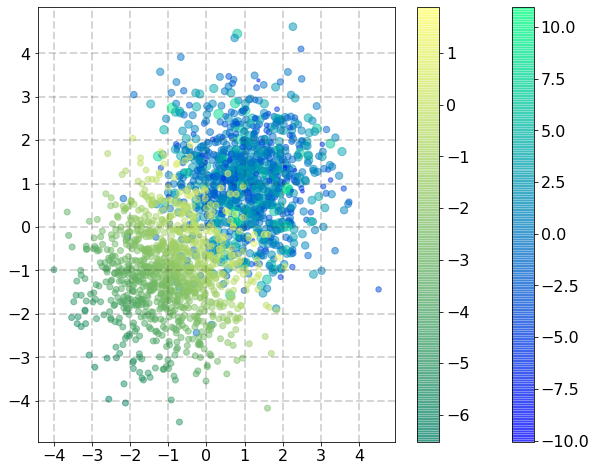

In [110]:
x1, y1, z1 = np.random.multivariate_normal([1, 1, 0], [[1, 0, 0], [0, 1, 0], [0, 0, 10]], 1000).T

# raw plot
# plt.scatter(x1, y1,alpha=0.5)

# Coloured
# plt.scatter(x1, y1, c=z1, cmap='winter')
# plt.colorbar()

# With sizes
plt.scatter(x1, y1, s=5*(z1 - min(z1)),c=z1, cmap='winter', alpha=0.5)
plt.colorbar()

# Add another scatter
x2, y2 = np.random.multivariate_normal([-1, -1], [[1, 0], [0, 1]], 1000).T
plt.scatter(x2, y2,c=x2+y2, alpha=0.5, cmap='summer')
plt.colorbar()

# Add a grid
# plt.grid()
# And tune it!!
plt.grid(alpha=0.2, linestyle='--', linewidth=2., color='0.2')

# The grid is bound to the ticks
plt.xticks(np.arange(-4, 4.1))
plt.yticks(np.arange(-4, 4.1));

# Set the limits of the plot
# plt.xlim([-2, 2])
# plt.ylim([-2, 2]);

Pokazany wyżej interface zaimplementowany w submodule `pyplot` naśladuje tworzenie rysunków dostępne w Matlabie. Jest prosty, ale nie daje pełnej kontroli nad rysunkiem. Więcej poczytać można na:

[OO matpltolib interface](https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure)

Przykłady:

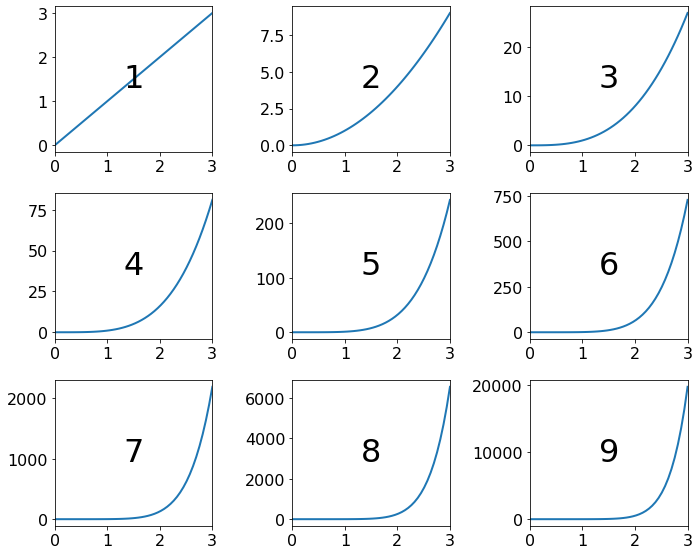

In [114]:
x = np.linspace(0, 3.)

# subplot arguments: # of rows, # of columns, plot index (row * (#cols) + col)
for i in range(9):
    ax = plt.subplot(3, 3, i+1) # the same as fig.add_subplot
    ax.plot(x, x**(i+1))
    ax.set_xlim(0, 3)
    y_center = np.array(ax.get_ylim()).sum()/2.
    ax.text(1.5, y_center, str(i + 1), ha='center', va='center', fontsize=32)

plt.tight_layout() # When doing multiple plots you should almost always use this command

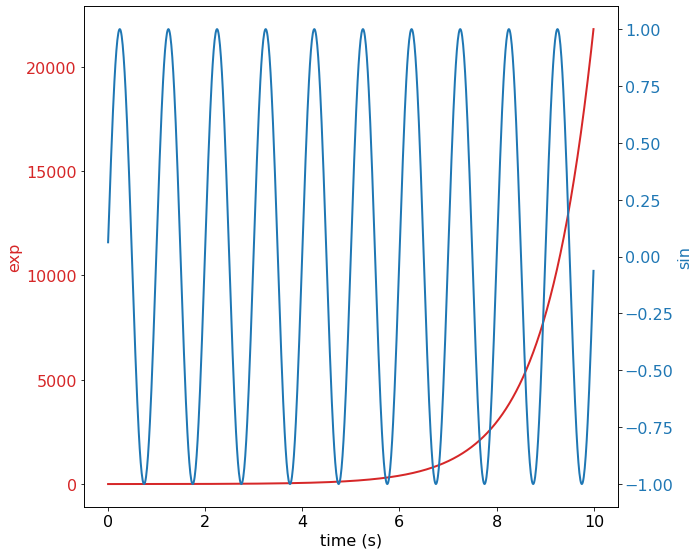

In [115]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

## Subplot/Shared axis

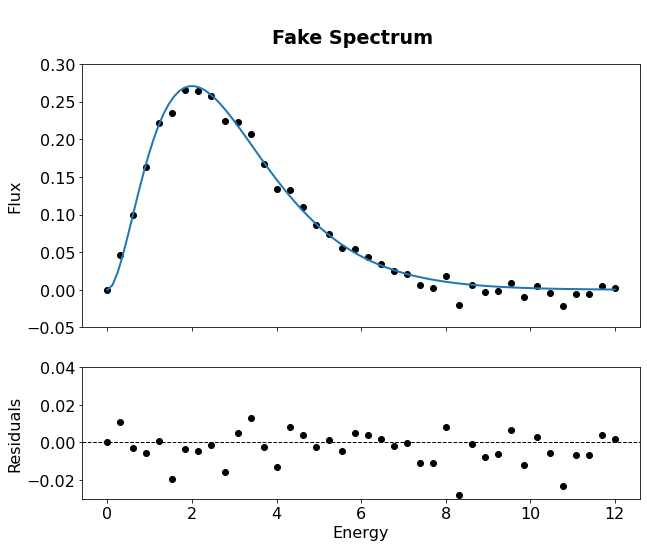

In [116]:
def poisson(x, k):
    return np.exp(-x)*x**k / np.math.factorial(k)

x = np.linspace(0, 12, 40)
y = poisson(x, 2)
y_noise = y + np.random.normal(0, 0.01, len(y))
z = np.linspace(0, 12, 100)

gridspec = {'height_ratios': [2, 1]}
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=gridspec)

ax1.plot(x, y_noise, 'ko')
ax1.plot(z, poisson(z, 2))
ax1.set_ylim(-0.05, 0.30)
ax1.set_ylabel('Flux')
#ax1.set_yticks(ax1.get_yticks()[1:])    # remove bottom y-tick

ax2.plot(x, y_noise - y, 'ko')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_xlabel('Energy')
ax2.set_ylim(-0.03, 0.04)
ax2.set_ylabel('Residuals')
#ax2.set_yticks(ax2.get_yticks()[:-2])   # remove top y-tick

#fig.subplots_adjust(hspace=0)
fig.suptitle('\nFake Spectrum', fontweight='bold');

### Using gridspec

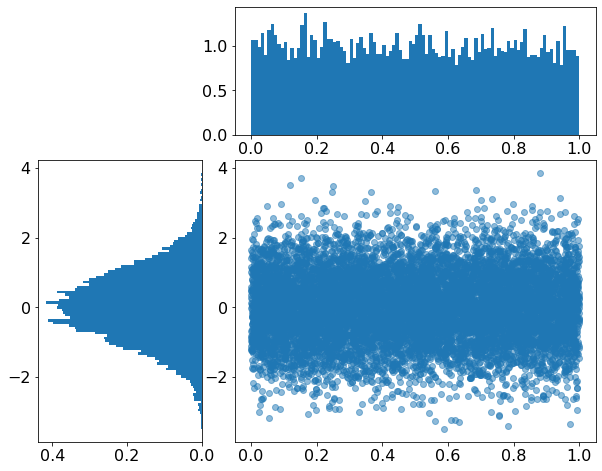

In [117]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

fig = plt.figure()
gspec = gridspec.GridSpec(3, 3) #, wspace=0.05, hspace=0.05)

top_histogram = fig.add_subplot(gspec[0, 1:])
side_histogram = fig.add_subplot(gspec[1:, 0])
lower_right = fig.add_subplot(gspec[1:, 1:])

# We produce two sets of random data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Normed histograms counts add up to 1, they resemble a probability density function
top_histogram.hist(X, bins=100, density=True)
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()
lower_right.scatter(X, Y, alpha=0.5)

# Remove the picks in-between
# top_histogram.set_xticks([])
# lower_right.set_yticks([])
# top_histogram.set_yticks(top_histogram.get_yticks()[1:])
# side_histogram.set_xticks(side_histogram.get_xticks()[1:]);

### Inside plots

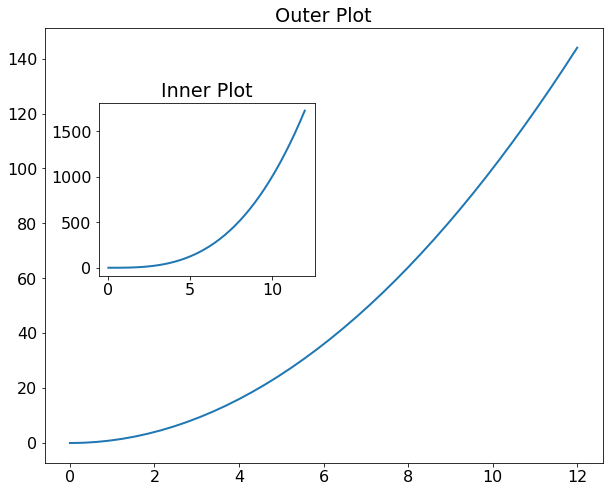

In [122]:
plt.plot(x, x**2)
plt.title("Outer Plot")

# axes coordinates: (0,0) is lower left, (1,1) upper right
plt.axes([0.2, 0.45, 0.3, 0.3])
plt.plot(x, x**3)
plt.title("Inner Plot");

## Inne przykłady

### Wyświetlanie zdjęcia

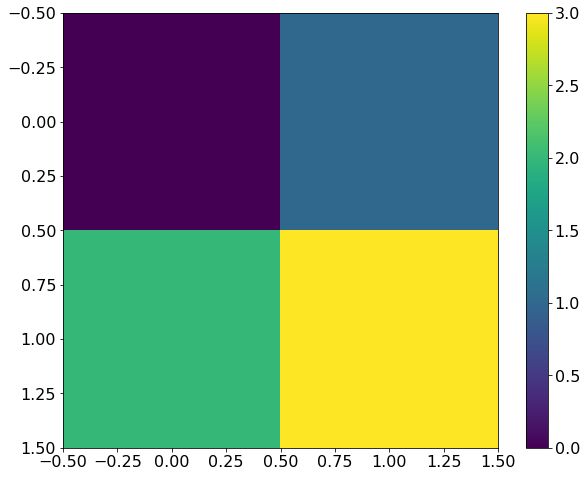

In [119]:
n_rows = 2
n_cols = 2
m = np.array([[n_rows*i + j for j in range(n_cols)] for i in range(n_rows)])
plt.imshow(m)
plt.colorbar();

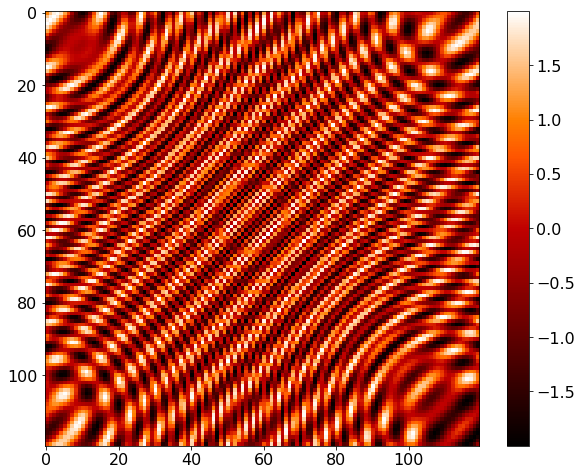

In [136]:
from matplotlib.colors import LogNorm

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 120).reshape(-1, 1)

im = plt.imshow(np.sin(10*(x+y)) + np.cos(10*(x**2+y**2)), cmap='gist_heat') #, clim=(-0.5, 0.5)) #, norm=LogNorm())
plt.colorbar();

### Box plot

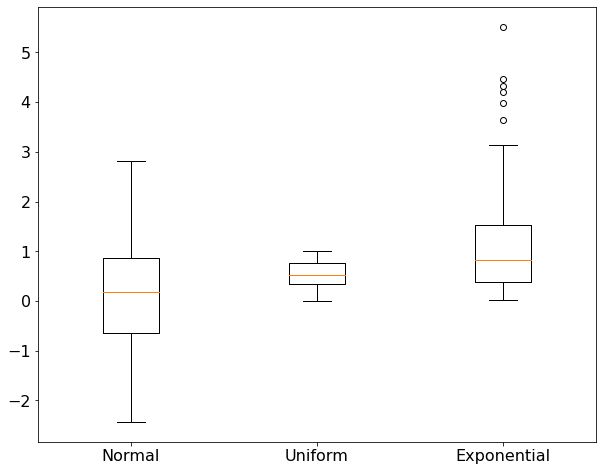

In [137]:
s1 = np.random.normal(size=100)
s2 = np.random.uniform(size=100)
s3 = np.random.exponential(size=100)
plt.boxplot([s1, s2, s3], labels=['Normal', 'Uniform', 'Exponential']);

### Pie charts (diagramy kołowe)

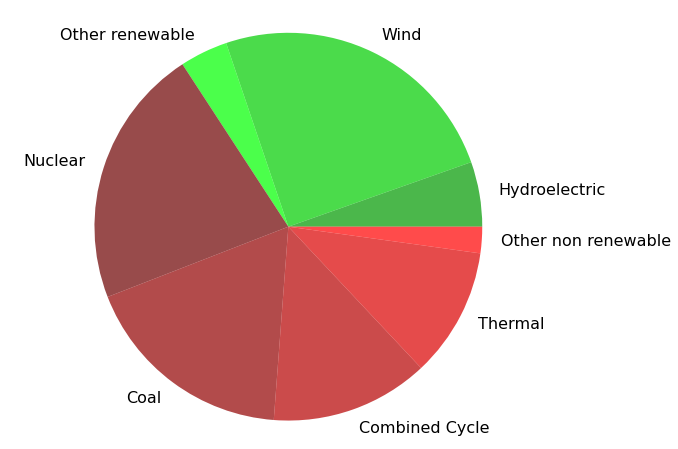

In [138]:
pie_order = [0, 4, 7, 1, 2, 3, 5, 6]
pie_data = power_data[11, pie_order]
pie_labels = [power_headers[i] for i in pie_order]
pie_colors = [(0, (i + 3)/5., 0, 0.7) for i in range(3)] + \
    [((i + 3)/7., 0, 0, 0.7) for i in range(5)] #RGB color specification

fig, ax = plt.subplots()
ax.pie(pie_data, labels=pie_labels, colors=pie_colors)
ax.axis('equal');

### Rzuty

In [139]:
import os
# Przygotowanie ścieżki do pliku:
data_directory= "../data" # Jeżeli zapisaliśmy dane gdzieś indziej musimy tutaj to zmienić.
data_path= os.path.join(data_directory, "GaiaDR2.csv")

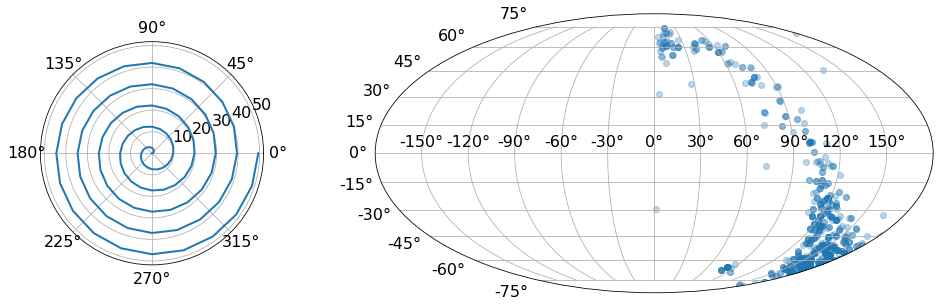

In [140]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 3, wspace=0.5)

theta = np.linspace(0, 5*2*np.pi, 101)
r = theta/2*np.pi

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(gs[0], projection='polar')
ax1.plot(theta, r)

gaia_data = np.loadtxt(data_path, delimiter=',', skiprows=11)
ax2 = fig.add_subplot(gs[1:], projection='mollweide')
ax2.scatter(np.deg2rad(gaia_data[:, 0]), np.deg2rad(gaia_data[:, 1]), alpha=0.3)
ax2.grid()

### Dostępne style

In [141]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


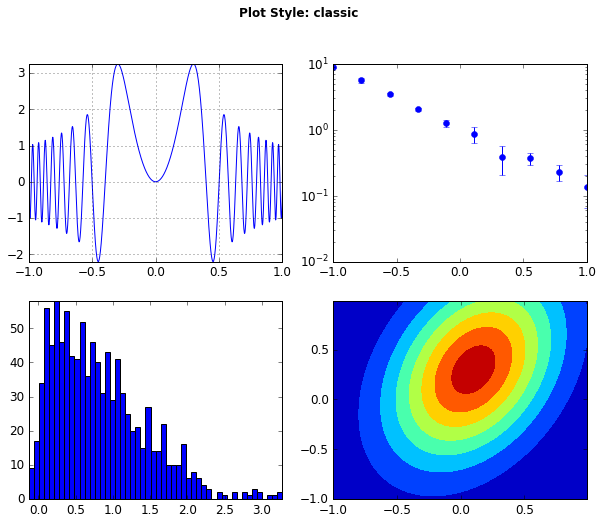

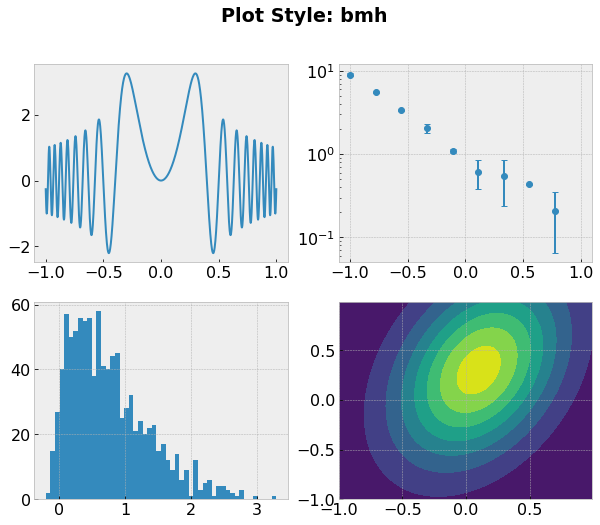

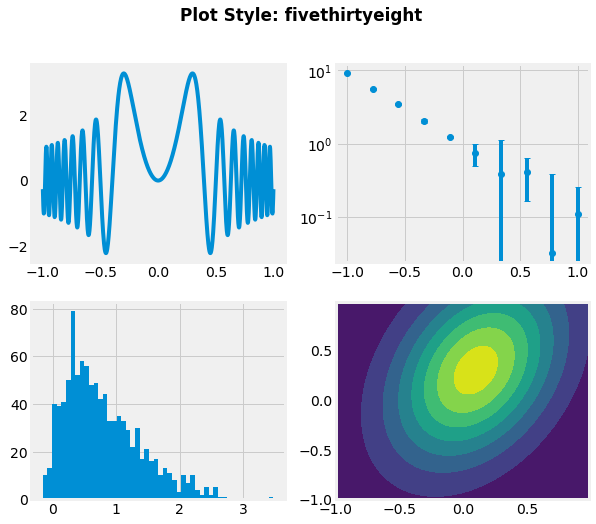

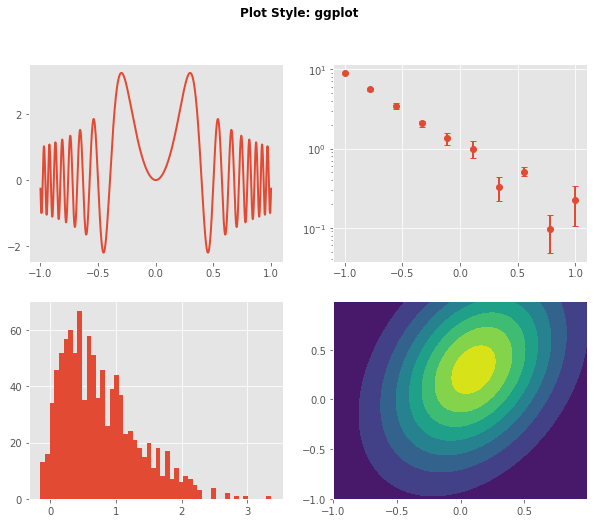

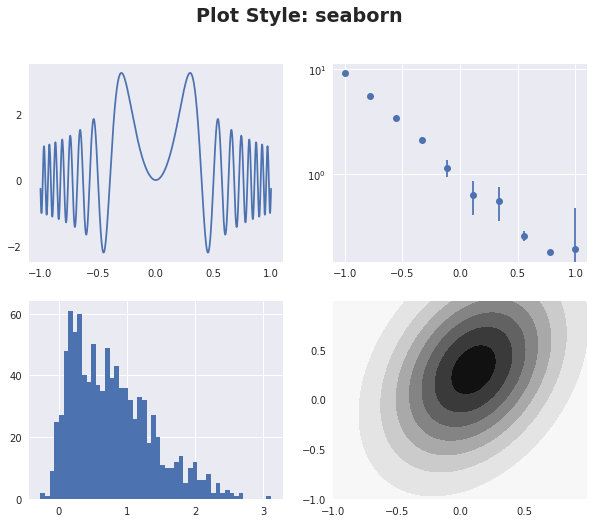

In [142]:
from scipy import stats

def plot_stuff():
    plt.subplot(2, 2, 1)
    x = np.linspace(-1, 1, 1000)
    plt.plot(x, np.sin(50*x**3)/(x))
    plt.grid()

    plt.subplot(2, 2, 2)
    x = np.linspace(-1, 1, 10)
    y = np.exp(-2.2*x) + np.random.normal(0, 0.1, 10)
    yerr = np.random.normal(0, 0.2, 10)
    plt.errorbar(x, y, yerr, fmt='o', capsize=3)
    plt.yscale('log')

    plt.subplot(2, 2, 3)
    x = stats.skewnorm.rvs(10, size=1000)
    plt.hist(x, bins=50)

    plt.subplot(2, 2, 4)
    x, y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.dstack((x, y))
    z = stats.multivariate_normal([0.1, 0.3], [[0.2, 0.3], [0.1, 0.4]])
    plt.contourf(x, y, z.pdf(pos))

for plot_style in ['classic', 'bmh', 'fivethirtyeight', 'ggplot', 'seaborn']:
    plt.figure()
    with plt.style.context(plot_style):   # use context manager so that changes are temporary
        plot_stuff()
        plt.suptitle('Plot Style: ' + plot_style, fontweight='bold')

### Zapisywanie rysunków

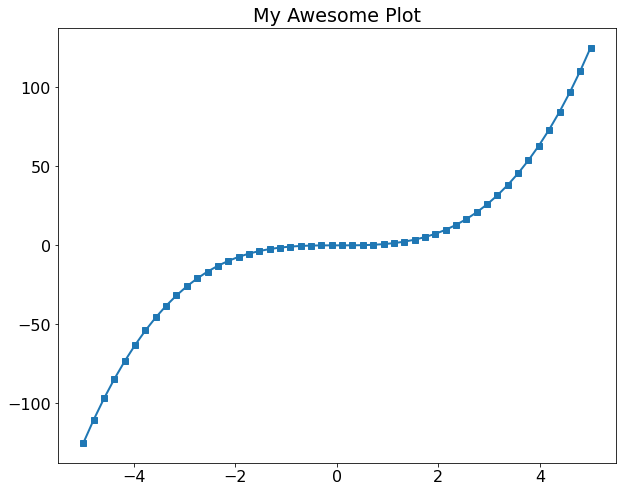

In [143]:
x = np.linspace(-5, 5)
plt.plot(x, x**3, marker='s')
plt.title("My Awesome Plot")

# save in current directory; extension determines file type
plt.savefig('awesome_plot.pdf')
plt.savefig('awesome_plot.eps')
plt.savefig('awesome_plot.png', dpi=300)   # bitmap graphics; don't use me for publications!
plt.savefig('awesome_plot.jpg', dpi=300)   # bitmap graphics; don't use me either!

# relative path with subdirectory
# plt.savefig('build/awesome_plot.pdf')

# absolute path
# plt.saveig('/path/to/output/directory/awesome_plot.pdf')

### Animacje

MovieWriter stderr:
dyld: Library not loaded: @rpath/libopenh264.5.dylib
  Referenced from: /Users/tr/opt/anaconda3/lib/libavcodec.58.54.100.dylib
  Reason: image not found



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '720x576', '-pix_fmt', 'rgba', '-r', '20.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/var/folders/qf/6gdbtgwj08j01n3flylb4f3w0000gn/T/tmpn03eze32/temp.m4v']' died with <Signals.SIGABRT: 6>.

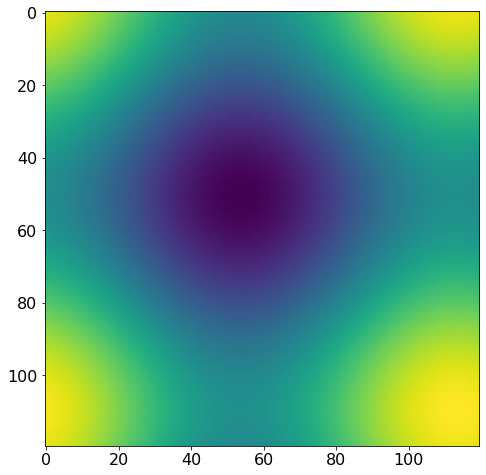

In [144]:
import matplotlib.animation as animation

class FunctionAnimatedImage():
    
    def func(self):
        return np.sin(self.x) + np.cos(self.y)
    
    def __init__(self):
        self.x = np.linspace(0, 2 * np.pi, 120)
        self.y = np.linspace(0, 2 * np.pi, 120).reshape(-1, 1)

        self.im = plt.imshow(self.func(), animated=True)
        
    def next_frame(self, i, *args):
        
        self.x += np.pi / 5.
        self.y += np.pi / 20.
        self.im.set_array(self.func())
        return self.im,

fig = plt.figure()
anim_img = FunctionAnimatedImage()

# Animate the image by recursively calling the next_frame function
ani_1 = animation.FuncAnimation(fig, anim_img.next_frame, frames=40, interval=50, blit=True)

# Embed the video in an html 5.0 video tag
HTML(ani_1.to_html5_video())
# In the case of : RuntimeError: Requested MovieWriter (ffmpeg) not available
# conda install -c conda-forge ffmpeg

### 3D plot

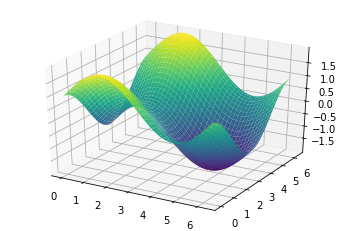

In [153]:
%matplotlib inline

import mpl_toolkits.mplot3d.axes3d as p3
x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 120).reshape(-1, 1)
z = np.sin(x) + np.cos(y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

### Seaborn

In [146]:
import seaborn as sns

In [147]:
np.random.seed(1234)

v1 = np.random.normal(0, 10, 1000)
v2 = 2*v1 + np.random.normal(60, 15, 1000)

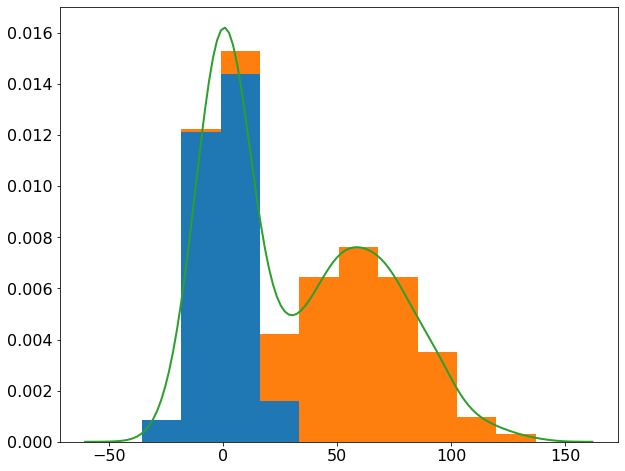

In [148]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

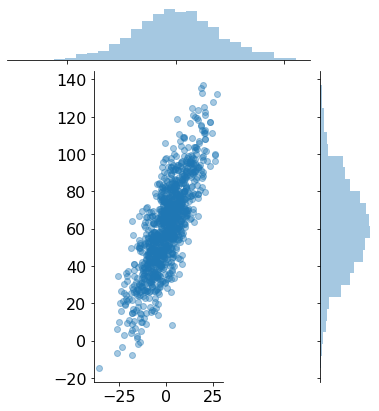

In [149]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

Więcej znajdź tutaj... https://seaborn.pydata.org/

## Zadania

### Zadanie 1.

Wygeneruj rysunki typu line plot, trzech spacerów losowych, pochodzących od różnych rozkładów losowych

Rysunki mają być:
* Wszystkie linie w sklaach szarości
* rózne markery dla każdej linii
* legenda umieszczona w `upper left`

**Wskazówka:** Użyj `np.cumsum` żeby wygenerować spacer losowy z próbki losowej.

### Zadanie 2.

Przygotuj trzy różne próby losowe.

Zwób rysunek na którym będą trzy znormalizowane histogramy na rysunku z 3 'axes' w jednej kolumnie, z dzieloną skalą na osiach x i y. (hared x-axis, y-axis.)

Wyświetl na każdym z histogramów nazwę rozkładu z którego pochodzą próbki.

Pomiędzy kolejnymi rysunkami nie powinno być pionowych przestrzeni a na górych dwóch rysunkach nie powinno być x-ticks.

Usuń y-ticks.

In [ ]:
xs = np.random.normal(0,2,1000)
ys = np.random.normal(0,2,1000)

sx_random_walk= np.cumsum(xs)
sy_random_walk= np.cumsum(ys)

In [ ]:
plt.plot(sx_random_walk, sy_random_walk)

<IPython.core.display.Javascript object>


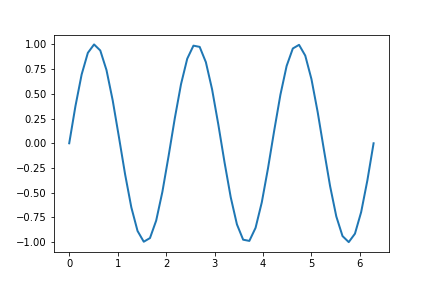

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [154]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update);